In [3]:
# General setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:


0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage


In [4]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()
#epochs_all = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 5, 25, 5, 25
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 5, 25

# Total 1-21
# 1-11 and 12-21
epoch_num = 0
for subject_name in range(1,21):
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
    # 为啥搞两遍？
    _,epoch_RF,_,_ = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    #epochs_all[epoch_num] = epoch_4R
    #epochs_all[epoch_num+1] = epoch_4F
    #epochs_all[epoch_num+2] = epoch_RF
 
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_num += 3
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# epoch_all = mne.concatenate_epochs(list(epochs_all.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

In [24]:
epoch_all = mne.concatenate_epochs([epoch_4F, epoch_RF, epoch_4R])
epoch_dur = np.zeros((3))
epoch_dur = [epoch_4F.get_data().shape[0]*epoch_4F.get_data().shape[2],epoch_RF.get_data().shape[0]*epoch_RF.get_data().shape[2],epoch_4R.get_data().shape[0]*epoch_4R.get_data().shape[2]]
epoch_count = [epoch_4F.get_data().shape[0],epoch_RF.get_data().shape[0],epoch_4R.get_data().shape[0]]
epoch_size = epoch_all.get_data().shape[2]

Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


(3020302, 64)


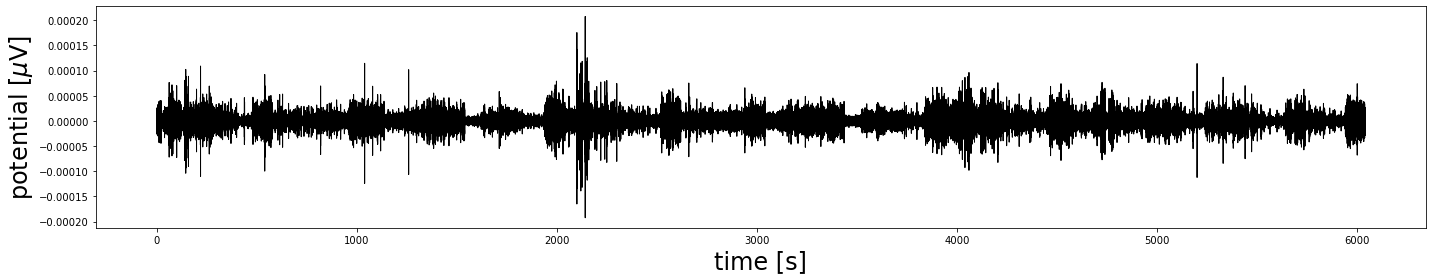

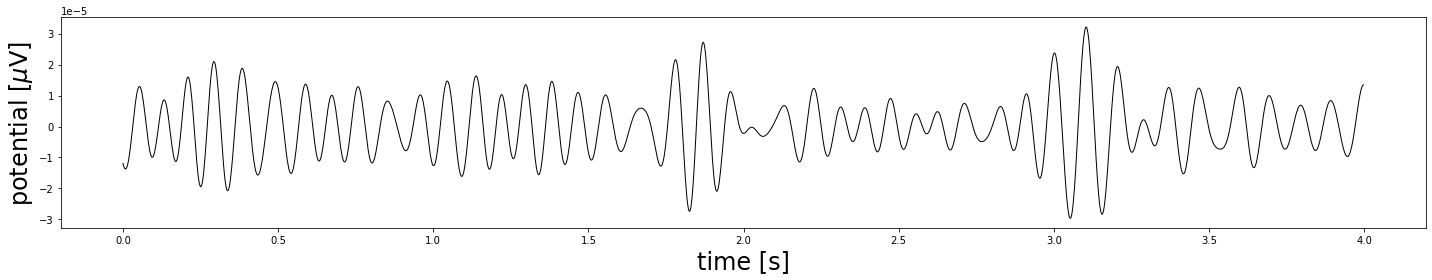

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 126860 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 69 iterations.
	K-means run 2/5 converged after 31 iterations.
	K-means run 3/5 converged after 50 iterations.
	K-means run 4/5 converged after 60 iterations.
	K-means run 5/5 converged after 138 iterations.
[+] Computation time: 85.39 sec

[+] Microstate back-fitting:
data_norm:  (3020302, 64)
data_cluster_norm:  (126860, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.633
GEV_0: 0.065
GEV_1: 0.091
GEV_2: 0.094
GEV_3: 0.070
GEV_4: 0.024
GEV_5: 0.104
GEV_6: 0.075
GEV_7: 0.112

Empirical symbol distribution (RTT):

p_0 = 0.003
p_1 = 0.147
p_2 = 0.106
p_3 = 0.208
p_4 = 0.122
p_5 = 0.187
p_6 = 0.218
p_7 = 0.007

Empirical transition matrix:

|0.8240.0160.0320.0270.0240.0300.0250.021|
|0.0000.8600.0210.0310.0200.0340.0330.001|
|0.0010.0220.8760.0280.0230.0180.0270.003|
|0.0000.0240.0130.8680.0190.0260.0480.002|
|0

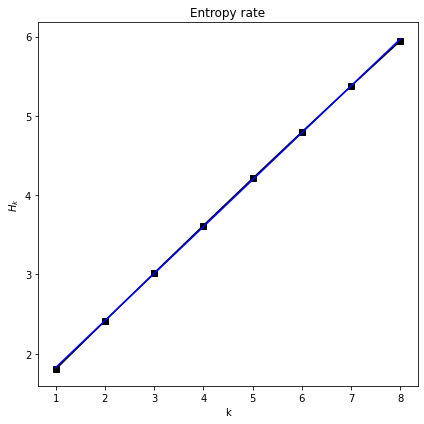


Empirical entropy rate h = 0.59
Theoretical MC entropy rate h = 0.61


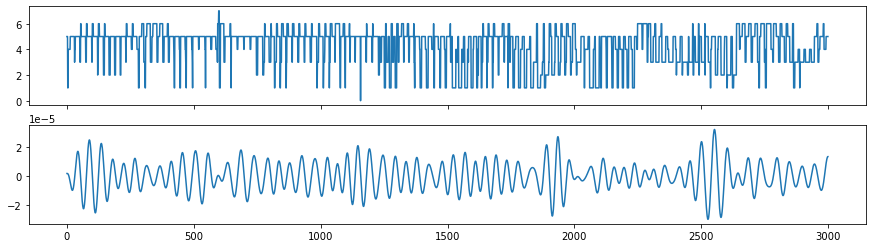

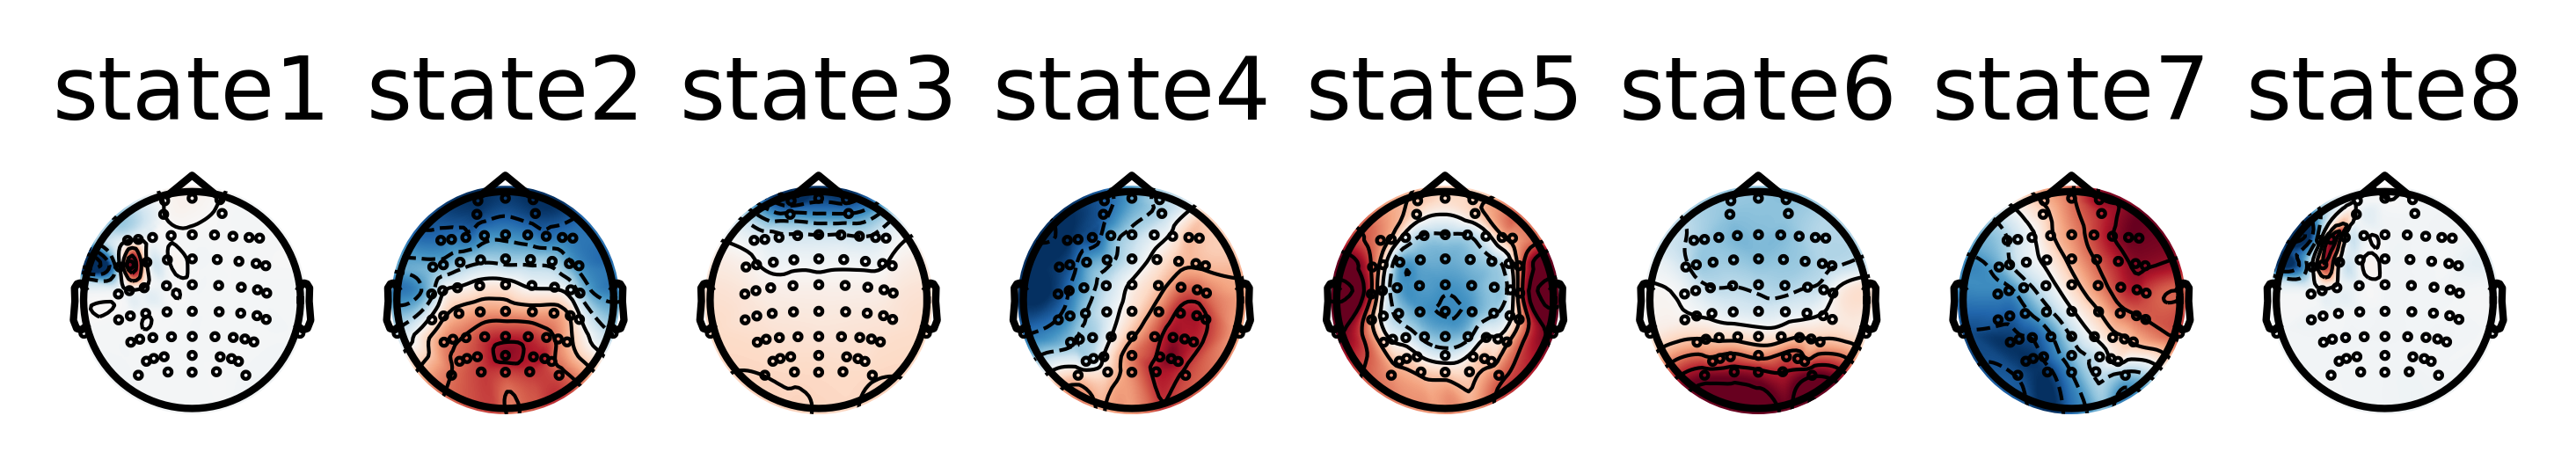

In [6]:
# epochs_order = list(epochs_4R.values())
# for i in list(epochs_4F.values()):
#     epochs_order.append(i)
# for i in list(epochs_RF.values()):
#     epochs_order.append(i)
# epoch_order = mne.concatenate_epochs(epochs_order)
epoch_order = epoch_all

dataRoot = "/work/zhangyq/Light/"

result_dir = dataRoot + "result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]

# Args to save MS result
save = False
to_save_cache = False
save_log = False

from langouEEG import *
vars_all = display_maps(epoch_order, n_maps=8, save=save, dpi=600, filename='all',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epoch_order,save_log=save_log, f_lo=8, f_hi=13)

In [72]:
# return maps, x, gfp_peaks, gev, data,pca1
x = vars_all[1]
gfp = vars_all[2]
gfp_l = np.zeros(x.shape[0])
gfp_l[gfp] = 1
u = v = 0
i_prev = x[0]
for i in x:
    if i != i_prev:
        if v-u < 15:
            for j in range(u, v):
                x[j] = 8
        v+=1
        u=v
    else:
        v+=1
x_4F = vars_all[1][0:epoch_dur[0]]
x_RF = vars_all[1][epoch_dur[0]:epoch_dur[0]+epoch_dur[1]]
x_4R = vars_all[1][epoch_dur[0]+epoch_dur[1]:epoch_dur[0]+epoch_dur[1]+epoch_dur[2]]

## Reject MS duration < 30 ms


In [19]:
reject_rate = np.sum(np.where(x==8,1,0))/x.shape[0]
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')

0.12201759956454686data rejected for too short duration ( < 30ms)


In [73]:
x_clean_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
gfp_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4F.shape[0]):
    if x_4F[j] != 8:
        x_clean_4F[i] = x_4F[j]
        gfp_4F[i] = gfp_l[j]
        i+=1
        
x_clean_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
gfp_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_RF.shape[0]):
    if x_RF[j] != 8:
        x_clean_RF[i] = x_RF[j]
        gfp_RF[i] = gfp_l[j]
        i+=1
        
x_clean_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
gfp_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4R.shape[0]):
    if x_4R[j] != 8:
        x_clean_4R[i] = x_4R[j]
        gfp_4R[i] = gfp_l[j]
        i+=1
        
        



## Quantitative measures
### Coverage

In [44]:
epoch_minimum = np.min(epoch_count)
coverage = np.zeros((3,epoch_minimum,8))
for i in range(epoch_minimum):
    coverage[0,i] = np.bincount(x_clean_4F[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[1,i] = np.bincount(x_clean_RF[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[2,i] = np.bincount(x_clean_4R[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size

In [55]:
'''pval matrix
4F-4R 0-7
RF-4R 8-15
4F-RF 16-23
'''
from statsmodels.stats.multitest import *
from scipy.stats import ttest_ind
pval = np.zeros(24)
for j in range(8):
    pval[j] = ttest_ind(coverage[0,:,j],coverage[2,:,j])[1]
    pval[8+j] = ttest_ind(coverage[1,:,j],coverage[2,:,j])[1]
    pval[16+j] = ttest_ind(coverage[0,:,j],coverage[1,:,j])[1]
fdr_val = fdrcorrection(pval,alpha=0.05,method='indep',is_sorted=False)
fdr_4F_4R = [fdr_val[0][0:8],fdr_val[1][0:8]]
fdr_RF_4R = [fdr_val[0][8:16],fdr_val[1][8:16]]
fdr_4F_RF = [fdr_val[0][16:24],fdr_val[1][16:24]]


In [61]:
fdr_val

(array([False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.77997579, 0.90429842, 0.19121627, 0.90429842, 0.90429842,
        0.90429842, 0.90429842, 0.90429842, 0.44903461, 0.90429842,
        0.00865745, 0.06965052, 0.90429842, 0.90429842, 0.29610595,
        0.50717883, 0.38307656, 0.68973705, 0.38307656, 0.12406881,
        0.90429842, 0.90429842, 0.38307656, 0.52113254]))

In [74]:
print(fdr_RF_4R)
print("Only coverage in RF-4R has significant change")

Only coverage in RF-4R has significant change


### Frequency of occurance

In [82]:
freq_occur_4F = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4F[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4F.append(freq_occur)
freq_occur_4F = np.array(freq_occur_4F)
freq_occur_RF = []
for i in range(epoch_minimum):
    idx = np.where(gfp_RF[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_RF.append(freq_occur)
freq_occur_RF = np.array(freq_occur_RF)
freq_occur_4R = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4R[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4R.append(freq_occur)
freq_occur_4R = np.array(freq_occur_4R)

<ipython-input-82-87ead1ec2557>:4: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
<ipython-input-82-87ead1ec2557>:11: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
<ipython-input-82-87ead1ec2557>:18: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])


In [91]:
freq_occur_4F[1,:]

array([0.        , 0.1043257 , 0.08396947, 0.25445293, 0.11450382,
       0.23409669, 0.20610687, 0.00254453])

In [86]:
'''pval matrix
4F-4R
RF-4R
4F-RF
'''
from statsmodels.stats.multitest import *
from scipy.stats import ttest_ind
pval = np.zeros(24)
for j in range(8):
    pval[j] = ttest_ind(freq_occur_4F[:,j],freq_occur_4R[:,j])[1]
    pval[8+j] = ttest_ind(freq_occur_RF[:,j],freq_occur_4R[:,j])[1]
    pval[16+j] = ttest_ind(freq_occur_4F[:,j],freq_occur_RF[:,j])[1]
fdr_val_freq = fdrcorrection(pval,alpha=0.05,method='indep',is_sorted=False)
fdr_4F_4R_freq = [fdr_val_freq[0][0:8],fdr_val_freq[1][0:8]]
fdr_RF_4R_freq = [fdr_val_freq[0][8:16],fdr_val_freq[1][8:16]]
fdr_4F_RF_freq = [fdr_val_freq[0][16:24],fdr_val_freq[1][16:24]]

In [87]:
fdr_val_freq
#显著得不正常

(array([ True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 array([9.78130034e-003, 5.27818708e-017, 9.09169500e-121, 1.04746701e-051,
        3.42205064e-011, 4.49485132e-116, 2.79558893e-016, 6.99221488e-001,
        1.91723518e-001, 1.34318653e-024, 9.09169500e-121, 3.60006455e-001,
        2.79558893e-016, 1.26838200e-085, 7.15010096e-058, 9.56940821e-006,
        7.95104083e-005, 3.11997146e-003, 2.58223719e-007, 1.95231049e-042,
        1.49359629e-032, 1.78682449e-051, 2.83450040e-074, 2.71202552e-005]))

### Duration

In [96]:
dur_4F = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4F[0]
    for j in x_clean_4F[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4F[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_RF = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_RF[0]
    for j in x_clean_RF[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_RF[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_4R = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4R[0]
    for j in x_clean_4R[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4R[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1


In [98]:
'''pval matrix
4F-4R
RF-4R
4F-RF
'''
from statsmodels.stats.multitest import *
from scipy.stats import ttest_ind
pval = np.zeros(24)
for j in range(8):
    pval[j] = ttest_ind(dur_4F[j],dur_4R[j])[1]
    pval[8+j] = ttest_ind(dur_RF[j],dur_4R[j])[1]
    pval[16+j] = ttest_ind(dur_4F[j],dur_RF[j])[1]
fdr_val_dur = fdrcorrection(pval,alpha=0.05,method='indep',is_sorted=False)
fdr_4F_4R_dur = [fdr_val_dur[0][0:8],fdr_val_dur[1][0:8]]
fdr_RF_4R_dur = [fdr_val_dur[0][8:16],fdr_val_dur[1][8:16]]
fdr_4F_RF_dur = [fdr_val_dur[0][16:24],fdr_val_dur[1][16:24]]


In [99]:
fdr_val_dur
#这很河里


(array([False, False,  True, False, False, False, False, False,  True,
        False,  True,  True, False, False, False,  True,  True, False,
         True,  True, False, False, False,  True]),
 array([5.78009958e-02, 3.19809317e-01, 6.90245473e-09, 6.85893519e-01,
        8.36115899e-01, 8.94764255e-01, 6.70366860e-01, 2.40102583e-01,
        9.85036950e-23, 1.72273338e-01, 1.87313939e-27, 1.43093055e-10,
        1.72273338e-01, 4.86450795e-01, 5.82780779e-01, 2.31529489e-33,
        3.20617910e-23, 6.85893519e-01, 7.49723894e-07, 2.13200859e-09,
        1.17750864e-01, 5.72687592e-01, 3.00868852e-01, 6.87949279e-28]))